In [1]:
import pandas as pd

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ratings = pd.read_csv(r'ml-latest-small/ml-latest-small/ratings.csv')
movies = pd.read_csv(r'ml-latest-small/ml-latest-small/movies.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [53]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
sum(ratings['movieId']==1)

215

In [7]:
ratings[ratings['movieId']==1]['rating'].mean()

3.9209302325581397

(array([ 4181.,  9342., 25597., 39954., 21762.]),
 array([0.5, 1.4, 2.3, 3.2, 4.1, 5. ]),
 <a list of 5 Patch objects>)

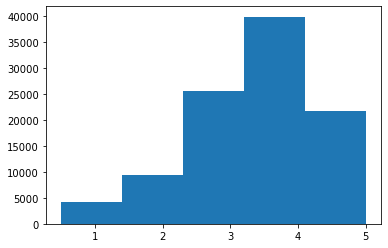

In [11]:
plt.hist(ratings['rating'],bins=5)

In [18]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

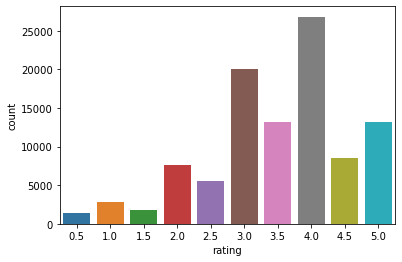

In [17]:
sns.countplot(x='rating',data=ratings)

In [19]:
ratings['userId'].nunique()

610

In [20]:
movies['title'].nunique()

9737

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [22]:
movies['movieId'].nunique()

9742

In [23]:
movies['title'].value_counts().head(10)

Emma (1996)                                                    2
War of the Worlds (2005)                                       2
Confessions of a Dangerous Mind (2002)                         2
Eros (2004)                                                    2
Saturn 3 (1980)                                                2
Paranoid Park (2007)                                           1
I'm a Cyborg, But That's OK (Saibogujiman kwenchana) (2006)    1
Bug (2007)                                                     1
Mr. Brooks (2007)                                              1
Librarian: Return to King Solomon's Mines, The (2006)          1
Name: title, dtype: int64

In [25]:
data = pd.merge(ratings,movies, on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [28]:
data['title'].nunique()

9719

In [36]:
data.groupby('title')['rating'].mean()

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [37]:
data.groupby('title')['rating'].count()

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, Length: 9719, dtype: int64

In [42]:
stats = pd.DataFrame(data.groupby('title')['rating'].mean(),columns=['rating'])

In [43]:
stats['count'] = data.groupby('title')['rating'].count()

In [45]:
stats.sample(10)

,rating,count
title,,
How to Lose a Guy in 10 Days (2003),3.275862,29
Baby Geniuses (1999),1.666667,3
Dave Chappelle: Killin' Them Softly (2000),4.000000,1
"Wind Will Carry Us, The (Bad ma ra khahad bord) (1999)",3.500000,1
"Clonus Horror, The (1979)",2.750000,2
Diary of a Wimpy Kid: Dog Days (2012),3.000000,1
Being Elmo: A Puppeteer's Journey (2011),3.500000,1
Silk Stockings (1957),3.500000,1
Born to Be Wild (1995),0.500000,1


In [60]:
len(stats)

9719

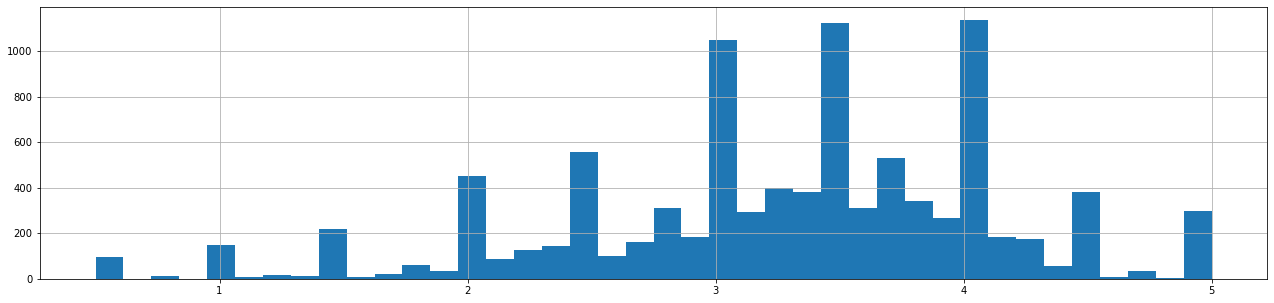

In [47]:
plt.figure(figsize=(22,5))
stats['rating'].hist(bins=40)

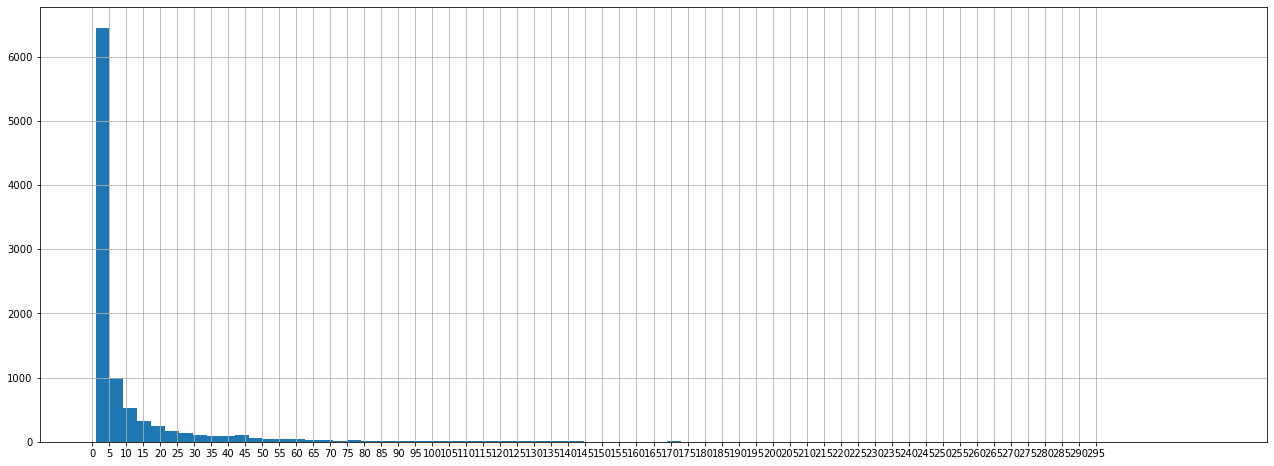

In [52]:
plt.figure(figsize=(22,8))
stats['count'].hist(bins=80)
plt.xticks(range(0,300,5))
plt.show()

In [59]:
sum(stats['count']>10)

2121

In [62]:
sns.set_style('whitegrid')

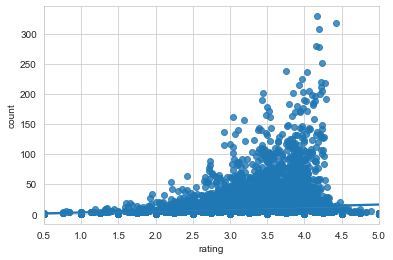

In [63]:
sns.regplot(x='rating',y='count',data=stats)

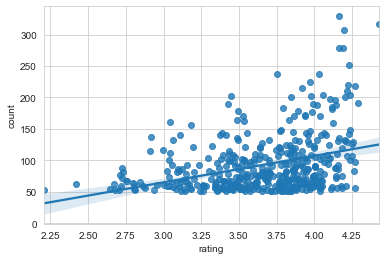

In [66]:
sns.regplot(x='rating',y='count',data=stats[stats['count']>50])

In [69]:
stats.sort_values(by='count',ascending=False).head(10)

,rating,count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [70]:
pivot = data.pivot_table(index='userId',columns='title',values='rating')
pivot

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [71]:
inp = 'Matrix, The (1999)'

In [72]:
pivot[inp].head(20)

userId
1     5.0
2     NaN
3     NaN
4     1.0
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    0.5
11    NaN
12    NaN
13    5.0
14    NaN
15    4.0
16    3.5
17    5.0
18    4.5
19    4.0
20    NaN
Name: Matrix, The (1999), dtype: float64

In [73]:
sim_inp = pivot.corrwith(pivot[inp])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [74]:
sim_inp

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                             -0.049146
xXx (2002)                                   0.495251
xXx: State of the Union (2005)               0.383482
¡Three Amigos! (1986)                       -0.006953
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [76]:
sim_inp = pd.DataFrame(sim_inp, columns=['similarity'])
sim_inp['count'] = stats['count']

In [77]:
sim_inp.head()

,similarity,count
title,,
'71 (2014),NaN,1
'Hellboy': The Seeds of Creation (2004),NaN,1
'Round Midnight (1986),NaN,2
'Salem's Lot (2004),NaN,1
'Til There Was You (1997),NaN,2


In [81]:
sim_inp[sim_inp['count']>40].sort_values(by = 'similarity',ascending=False)

,similarity,count
title,,
"Matrix, The (1999)",1.000000,278
Tommy Boy (1995),0.674887,50
Slumdog Millionaire (2008),0.613839,71
Kung Fu Panda (2008),0.612549,54
Interstellar (2014),0.599040,73
...,...,...
City Slickers II: The Legend of Curly's Gold (1994),-0.293258,55
Time Bandits (1981),-0.354818,41
"Flintstones, The (1994)",-0.375706,42
